# ABM Design 

The notebook contains both testing code as well as thoughts regarding how agents/households are designed within the simulation

# Configuration JSON

We have the simulation configurations within the configuration folder inside a .json file 

In [1]:
import json 

with open("configurations/single_run.json", 'r') as config_file:
    config_dict = json.load(config_file)

# Running Config 
## Single Run 

In [7]:
from abm.model import Market
import json 
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2

In [55]:
import json
import plotly.graph_objs as go


def plot_hh_elec_demand(abm_model):
    fig = go.Figure()
    
    # Ensure abm_model.hours_in_month is an array-like object
    x_axis = list(range(len(abm_model.solar_energy_production_arr)))

    for index, hh_obj in enumerate(abm_model.households):
        fig.add_trace(go.Scatter(x=x_axis, y=hh_obj.electricity_use, name=f"{index}"))
    
    # Add title and labels
    fig.update_layout(
        title='Electricity Demand: Always consume Morty never return',
        xaxis_title='time',
        yaxis_title='kw/h2'
    )
    
    fig.show()


def plot_hh_elec_prod(abm_model):

    fig = go.Figure()

    x_axis = list(range(len(abm_model.solar_energy_production_arr)))
    fig.add_trace(go.Scatter(x= list(range(len(abm_model.solar_energy_production_arr))), y = abm_model.solar_energy_production_arr, name= "Solar Irradience (Sun that shines)" ))

    for index, hh_obj in enumerate(abm_model.households):
        fig.add_trace(go.Scatter(x=x_axis, y=hh_obj.solar_prod, name=f"{index}"))
    
    fig.update_layout(
        title='Sun that shines vs Sun we capture',
        xaxis_title='time',
        yaxis_title='kw/h2'
    )

    # Show the plot
    fig.show()


if __name__ == "__main__":

    # Loading the simulation configuration information 
    config_dict = {} 
    with open("configurations/single_run.json", 'r') as config_file:
        config_dict = json.load(config_file)
    
    prosumer_count = config_dict["prosumer_count"]

    #Imports the relevant household param json file from configurations/household_params/ folder
    #adds that to the config_dict and passes the rest to the Market class
    with open(f"configurations/household_params/prosumer{prosumer_count}.json", 'r') as config_file:
        household_params = json.load(config_file)
    
    config_dict["household_params"] = household_params["household_params"]
    num_runs = config_dict["n_runs"] #number of times we run the same configuration
    
    #for multirun simulation 
    for run_number in range(1, num_runs + 1): 
        abm_model = Market(config_dict,run_number)
        abm_model.run_simulation()
    
    # plot_hh_elec_demand(abm_model)
    # plot_hh_elec_prod(abm_model)


-------------------------------------------------- RUN SIMULATION --------------------------------------------------
------------------------------ Initializing ------------------------------
------------------------------ Initialization Complete ------------------------------
-------------------- timestep : 0 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 1 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 2 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 3 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 4 --------------------
--------------- STARTIN

/Users/nalin/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 662 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 663 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 664 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 665 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 666 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING AMM EXCHANGE ---------------
-------------------- timestep : 667 --------------------
--------------- STARTING AMM EXCHANGE ---------------
--------------- ENDING

## Batch Run

In [48]:
from abm.model import Market
import json 

if __name__ == "__main__":

    # Loading the simulation configuration information 
    config_dict = {} 
    file_path = "configurations/batch_run.json" 

    with open(file_path, 'r') as config_file:
        config_dict_list = json.load(config_file)
    
    #There are a list of configurations that we are running 
    for config_dict in config_dict_list:
        prosumer_count = config_dict["prosumer_count"]
        #Imports the relevant household param json file from configurations/household_params/ folder
        #adds that to the config_dict and passes the rest to the Market class
        with open(f"configurations/household_params/prosumer{prosumer_count}.json", 'r') as config_file:
            household_params = json.load(config_file)
        
        config_dict["household_params"] = household_params["household_params"]
        num_runs = config_dict["n_runs"] #number of times we run the same configuration
        
        #for multirun simulation, 
        for run_number in range(1, num_runs + 1): 
            abm_model = Market(config_dict,run_number)
            abm_model.run_simulation()

-------------------------------------------------- RUN SIMULATION --------------------------------------------------
------------------------------ Initializing ------------------------------
------------------------------ Initialization Complete ------------------------------
-------------------- timestep : 0 --------------------
-------------------- timestep : 1 --------------------
-------------------- timestep : 2 --------------------
-------------------- timestep : 3 --------------------
-------------------- timestep : 4 --------------------
-------------------- timestep : 5 --------------------
-------------------- timestep : 6 --------------------
-------------------- timestep : 7 --------------------
-------------------- timestep : 8 --------------------
-------------------- timestep : 9 --------------------
-------------------- timestep : 10 --------------------
-------------------- timestep : 11 --------------------
-------------------- timestep : 12 --------------------
----

Traceback (most recent call last):
  File "/Users/nalin/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d0/s9c6yjk57rs1bt_y8czd45vr0000gn/T/ipykernel_50911/617300854.py", line 27, in <module>
    abm_model.run_simulation()
  File "/Users/nalin/Desktop/UChicago/MACS 40550/Final Project/p2p_solar_abm/abm/model.py", line 224, in run_simulation
    self.tally_op_sf_hh()
  File "/Users/nalin/Desktop/UChicago/MACS 40550/Final Project/p2p_solar_abm/abm/model.py", line -1, in tally_op_sf_hh
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/nalin/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nalin/anaconda3/lib/pytho

## Conversion of Irradiance data to solar energy 

This method processes an array of raw irradiance data, which represents the solar power available per unit area at each minute throughout a month. The method adjusts this raw irradiance to reflect the actual energy that a fixed tilt solar panel would collect, considering the panel's geographic location and orientation relative to the sun. Here’s a step-by-step breakdown of what happens in the method:

1. **Declination Calculation**: Calculates the solar declination angle for each day, which is the angle between the rays of the sun and the plane of the Earth's equator. This angle varies throughout the year and affects the sun’s position in the sky relative to a fixed location on Earth.

2.  **Solar Noon and Hour Angle** : Computes the solar noon (the time when the sun is highest in the sky) for each day, and the hour angle for every minute. The hour angle indicates the sun's position relative to its highest point (solar noon).

3. **Altitude and Azimuth Angles**: Determines the altitude angle (how high the sun is in the sky) and the solar azimuth angle (the compass direction from which the sunlight is coming) for each minute. These angles are crucial for calculating the amount of sunlight that hits the panel directly.

4. **Incidence Angle** : Calculates the angle of incidence, which is the angle at which solar radiation strikes the panel. This angle affects how effectively the panel can convert irradiance into usable energy.

### Component Radiation Calculations:

1. **Beam Radiation**: The direct sunlight that hits the panel.
2. **Diffuse Radiation**: Sunlight scattered by the atmosphere.
3. **Reflected Radiation**: Sunlight reflected off the ground and other surfaces onto the panel.
4. **Total Collected Radiation**: Summarizes the beam, diffuse, and reflected radiation to estimate the total solar radiation captured by the panel per minute.

### Method 2: solarNoon
This auxiliary method supports the first by determining the exact minute of solar noon for each day. Solar noon time varies slightly each day due to the equation of time and the specific longitudinal correction for the location’s difference from the standard time meridian. It also considers whether daylight saving time is in effect, adjusting the solar noon calculation accordingly.

### Application in Solar Energy Simulation
These methods together enable a detailed simulation of solar energy production for fixed tilt solar panels. By adjusting raw irradiance data based on precise calculations of the sun's angles and the panel's orientation, the simulation can predict how much energy the panel will produce at any given minute throughout the month. This is crucial for optimizing solar panel installations, estimating energy yields, and planning for energy needs in solar-reliant systems.

The calculations are based on solar geometry and require accurate geographic data (latitude, longitude) and a detailed understanding of the panel's orientation (tilt angle, azimuth direction). These simulations help in designing more efficient solar power systems by predicting performance across different times of the day and seasons.

In [ ]:
import math
import numpy as np
import pandas as pd 

class SolarModel:
    def __init__(self, latitude, longitude, localTimeMeridian, daysInMonth, beginMonthDay):
        self.latitude = latitude
        self.longitude = longitude
        self.localTimeMeridian = localTimeMeridian
        self.daysInMonth = daysInMonth
        self.beginMonthDay = beginMonthDay
        self.dayLightSavings = False
    
    def adjustIrradiance(self, irradianceArray, problematic_indices=[]):
        minutesInMonth = self.daysInMonth * 1440
        declination = np.zeros(minutesInMonth)
        hourAngle = np.zeros(minutesInMonth)
        altitudeAngle = np.zeros(minutesInMonth)
        solarAzimuth = np.zeros(minutesInMonth)
        C = np.zeros(minutesInMonth)
        incidenceAngle = np.zeros(minutesInMonth)
        beamRad = np.zeros(minutesInMonth)
        diffuseRad = np.zeros(minutesInMonth)
        reflectedRad = np.zeros(minutesInMonth)
        collectorRad = np.zeros(minutesInMonth)
        
        for i in range(self.daysInMonth):
            currentDeclination = 23.45 * math.sin(math.radians((360/365) * (self.beginMonthDay + i)))
            minuteOfSolarNoon = self.solarNoon(self.beginMonthDay + i)
            currentC = 0.095 + (0.04 * math.sin(math.radians((360/365) * (self.beginMonthDay + i - 100))))

            for j in range(1440):
                currentMinute = (1440 * i) + j
                declination[currentMinute] = currentDeclination
                minutesFromSolarNoon = (minuteOfSolarNoon - j)
                hourAngle[currentMinute] = (minutesFromSolarNoon / 60.0) * 15.0
                altitudeAngle[currentMinute] = math.degrees(math.asin(math.cos(math.radians(self.latitude)) * 
                                            math.cos(math.radians(declination[currentMinute])) * 
                                            math.cos(math.radians(hourAngle[currentMinute])) + 
                                            (math.sin(math.radians(self.latitude)) * 
                                             math.sin(math.radians(declination[currentMinute])))))
                solarAzimuth[currentMinute] = math.degrees(math.asin((math.cos(math.radians(declination[currentMinute])) * 
                                          math.sin(math.radians(hourAngle[currentMinute])))/
                                          (math.cos(math.radians(altitudeAngle[currentMinute])))))
                incidenceAngle[currentMinute] = math.degrees(math.acos(math.cos(math.radians(altitudeAngle[currentMinute])) * 
                                           math.cos(math.radians(solarAzimuth[currentMinute])) * 
                                           math.sin(math.radians(self.latitude)) + 
                                           (math.sin(math.radians(altitudeAngle[currentMinute])) * 
                                            math.cos(math.radians(self.latitude)))))
                C[currentMinute] = currentC
                beamRad[currentMinute] = irradianceArray[currentMinute] * math.cos(math.radians(incidenceAngle[currentMinute]))
                diffuseRad[currentMinute] = irradianceArray[currentMinute] * currentC * ((1 + math.cos(math.radians(self.latitude))) / 2)
                reflectedRad[currentMinute] = irradianceArray[currentMinute] * 0.2 * (currentC + math.sin(math.radians(altitudeAngle[currentMinute]))) * ((1 - math.cos(math.radians(self.latitude))) / 2)
                collectorRad[currentMinute] = beamRad[currentMinute] + diffuseRad[currentMinute] + reflectedRad[currentMinute]

                # Debugging output for problematic indices
                if currentMinute in problematic_indices:
                    print(f"Minute {currentMinute}: Irradiance = {irradianceArray[currentMinute]}, "
                          f"BeamRad = {beamRad[currentMinute]}, DiffuseRad = {diffuseRad[currentMinute]}, "
                          f"ReflectedRad = {reflectedRad[currentMinute]}, CollectorRad = {collectorRad[currentMinute]}")

        return collectorRad

    def solarNoon(self, n):
        # if 69 <= n <= 307:
        #     self.dayLightSavings = True
        # else:
        #     self.dayLightSavings = False

        longitudeCorrection = 4.0 * (self.localTimeMeridian - self.longitude)  # Units of minutes
        Bdegrees = (360.0/364.0) * (n - 81)
        Bradians = math.radians(Bdegrees)
        E = (9.87 * math.sin(2 * Bradians)) - (7.53 * math.cos(Bradians)) - (1.5 * math.sin(Bradians))  # Units of minutes
        minutesFromClockNoon = -longitudeCorrection - E
        minutesFromClockNoonInt = int(round(minutesFromClockNoon))
        
        if self.dayLightSavings:
            return (13 * 60) + minutesFromClockNoonInt
        else:
            return (12 * 60) + minutesFromClockNoonInt


In [ ]:
# Example usage
latitude = 20.77
longitude = 156.92
localTimeMeridian = 150.0
daysInMonth = 30
beginMonthDay = 244

# Problematic indices provided earlier
problematic_indices = [384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,
                       402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 1825,
                       1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840,
                       1841, 1842, 1843, 1844, 1845, 1846, 1847, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
                       1857, 1858, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 4706, 4707, 4708, 4709, 4710,
                       4711, 4712, 4713, 4714, 4715, 4716, 4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725,
                       4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738, 6146, 6147,
                       6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162,
                       6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177,
                       6178, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 7615, 7616, 7617, 9025,
                       9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040,
                       9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050, 9051, 9052, 9053, 9054, 9055,
                       9056, 9057, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475,
                       10476, 10477, 10478, 10479, 10480, 10481, 10482, 10483, 10484, 10485, 10486, 10487, 10488,
                       10489, 10490, 10491, 10492, 10493, 10494, 10495, 10496, 10497, 11910, 11911, 11912, 11913,
                       11914, 11915, 11916, 11917, 11918, 11919, 11920, 11921, 11922, 11923, 11924, 11925, 11926,
                       11927, 11928, 11929, 11930, 11931, 11932, 11933, 11934, 11935, 13345, 13346, 13347, 13348,
                       13349, 13350, 13351, 13352, 13353, 13354, 13355, 13356, 13357, 13358, 13359, 13360, 13361,
                       13362, 13363, 13364, 13365, 13366, 13367, 13368, 13369, 13370, 13371, 13372, 13373, 13374,
                       13375, 13376, 14785, 14786, 14787, 14788, 14789, 14790, 14791, 14792, 14793, 14794, 14795,
                       14796, 14797, 14798, 14799, 14800, 14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808,
                       14809, 14810, 14811, 14812, 14813, 14814, 14815, 16227, 16228, 16229, 16230, 16231, 16232,
                       16233, 16234, 16235, 16236, 16237, 16238, 16239, 16240, 16241, 16242, 16243, 16244, 16245,
                       16246, 16247, 16248, 16249, 16250, 16251, 16252, 16253, 16254, 16255, 16256, 17666, 17667,
                       17668, 17669, 17670, 17671, 17672, 17673, 17674, 17675, 17676, 17677, 17678, 17679, 17680,
                       17681, 17682, 17683, 17684, 17685, 17686, 17687, 17688, 17689, 17690, 17691, 17692, 17693,
                       17694, 17695, 17696, 19105, 19106, 19107, 19108, 19109, 19110, 19111, 19112, 19113, 19114,
                       19115, 19116, 19117, 19118, 19119, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127,
                       19128, 19129, 19130, 19131, 19132, 19133, 19134, 19135, 20545, 20546, 20547, 20548, 20549,
                       20550, 20551, 20552, 20553, 20554, 20555, 20556, 20557, 20558, 20559, 20560, 20561, 20562,
                       20563, 20564, 20565, 20566, 20567, 20568, 20569, 20570, 20571, 20572, 20573, 20574, 20575,
                       23432, 23433, 23434, 23435, 23436, 23437, 23438, 23439, 23440, 23441, 23442, 23443, 23444,
                       23445, 23446, 23447, 23448, 23449, 23450, 23451, 23452, 23453, 23454, 24868, 24869, 24870,
                       24871, 24872, 24873, 24874, 24875, 24876, 24877, 24878, 24879, 24880, 24881, 24882, 24883,
                       24884, 24885, 24886, 24887, 24888, 24889, 24890, 24891, 24892, 24893, 24894, 26311, 26312,
                       26313, 26316, 26317, 26318, 26319, 26320, 26321, 26322, 26323, 26324, 26325, 26326, 26327,
                       26328, 26329, 26330, 26331, 26332, 26333, 26334, 27749, 27756, 27757, 27758, 27759, 27760,
                       27761, 27762, 27763, 27766, 27767, 27768, 27769, 27770, 27771, 27772, 29192, 29197, 29198,
                       29199, 29200, 29201, 29202, 29203, 29204, 29205, 29206, 29207, 29208, 29209, 29210, 29211,
                       29212, 29213, 29214, 32072, 32073, 32074, 32075, 32076, 32077, 32078, 32079, 32080, 32081,
                       32082, 32083, 32084, 32085, 32086, 32087, 32088, 32089, 32090, 32091, 32092, 32093, 33509,
                       33510, 33513, 33514, 33515, 33516, 33517, 33518, 33519, 33520, 33521, 33522, 33523, 33524,
                       33525, 33526, 33527, 33528, 33529, 33530, 33531, 33532, 33533, 34948, 34949, 34950, 34951,
                       34952, 34953, 34954, 34955, 34956, 34957, 34958, 34959, 34960, 34961, 34962, 34963, 34964,
                       34965, 34966, 34967, 34968, 34969, 34970, 34971, 34972, 36388, 36389, 36390, 36391, 36392,
                       36393, 36394, 36395, 36396, 36397, 36398, 36399, 36400, 36401, 36402, 36403, 36404, 36405,
                       36406, 36407, 36408, 36409, 36410, 36411, 36412, 37852, 37853, 42152, 42153, 42154, 42155,
                       42156, 42157, 42158, 42159, 42160, 42161, 42162, 42163, 42164, 42165, 42166, 42167, 42168,
                       42169, 42170, 42171, 42172]


len(problematic_indices)
# # Create instance of SolarModel
solar_model = SolarModel(latitude, longitude, localTimeMeridian, daysInMonth, beginMonthDay)

# # Load your irradiance array
irradiance_array = pd.read_csv("data/production_monthly_minutely.csv")
irradiance_array = irradiance_array.squeeze()

#irradiance_array[17660:17700]
# # Call the method with problematic indices for debugging
solar_energy_production = solar_model.adjustIrradiance(irradiance_array, problematic_indices)


### Declination Angle

The declination angle \( \delta \) varies daily and is given by:

$$
\delta = 23.45 \cdot \sin\left(\frac{360}{365} \cdot (n + d - 81)\right)
$$

where:
- \( n \) is the day of the year,
- \( d \) is the day index within the month.

### Solar Noon

Solar noon time \( t_{\text{noon}} \) and correction factors:

$$
t_{\text{noon}} = 720 + 4 \cdot (\text{LSTM} - \text{long}) + E
$$

$$
E = 9.87 \cdot \sin(2B) - 7.53 \cdot \cos(B) - 1.5 \cdot \sin(B)
$$

$$
B = \frac{360}{364} \cdot (n - 81)
$$

where:
- $\text{LSTM}$ is the local standard time meridian,
- $\text{long}$ is the longitude.

### Hour Angle

The hour angle \( H \) for a given minute \( m \) of the day is:

$$
H = \frac{m - t_{\text{noon}}}{4}
$$

### Solar Altitude Angle

The solar altitude angle \( \alpha \) is calculated as:

$$
\alpha = \sin^{-1}\left(\sin(\text{lat}) \cdot \sin(\delta) + \cos(\text{lat}) \cdot \cos(\delta) \cdot \cos(H)\right)
$$

where \(\text{lat}\) is the latitude.

### Solar Azimuth Angle

The solar azimuth angle \( Az \) is:

$$
Az = \sin^{-1}\left(\frac{\sin(H) \cdot \cos(\delta)}{\cos(\alpha)}\right)
$$

### Incidence Angle

The incidence angle  $\theta$ for a fixed tilt panel:

$$
\theta = \cos^{-1}\left(\sin(\text{lat}) \cdot \sin(\alpha) + \cos(\text{lat}) \cdot \cos(\alpha) \cdot \cos(Az)\right)
$$

### Radiation Components

1. **Beam Radiation**:
   $$
   I_{\text{beam}} = I \cdot \cos(\theta)
   $$
2. **Diffuse Radiation**:
   $$
   I_{\text{diffuse}} = I \cdot C \cdot \frac{1 + \cos(\text{lat})}{2}
   $$
3. **Reflected Radiation**:
   $$
   I_{\text{reflected}} = I \cdot 0.2 \cdot (C + \sin(\alpha)) \cdot \frac{1 - \cos(\text{lat})}{2}
   $$

### Total Collector Radiation

The total radiation collected by the collector $ I_{\text{total}} $:

$$
I_{\text{total}} = I_{\text{beam}} + I_{\text{diffuse}} + I_{\text{reflected}}
$$


## Going from maximum irradiance that might fall to how much can your solar panel capture.

At minute j within the given month 
$$
\text{individual\_production\_ledger}[j] = \text{adjusted\_individual\_minute\_production}[j] \times 0.092903 \times (\text{roof\_area} \times 0.10) \times 0.253 \times 0.77
$$


The paper provides context for the factors and assumptions involved in the model code for calculating individual solar production for houses. Here are the details about the constants used in the calculation:

1. **0.092903**: This value is the conversion factor from square feet to square meters. Since the roof area is likely measured in square feet, this conversion factor is used to convert the roof area into square meters, which is the standard unit for irradiance and other related calculations.

2. **0.10**: This is the assumed proportion of the roof area that is available for installing solar panels. It accounts for factors like shading, roof structure, and practical installation constraints. The paper mentions that 10% of the roof area is considered a reasonable estimate for solar panel coverage.

3. **0.253**: This constant likely represents the panel efficiency or a related factor affecting the conversion of solar irradiance into electricity. It could be the efficiency of the solar panels or an adjustment factor to account for the specific performance characteristics of the installed panels. However, the exact origin of this value isn't detailed in the provided excerpts from the paper.

4. **0.77**: This constant represents the derate factor, which accounts for various losses in the system, such as inefficiencies in the inverter, wiring losses, shading, and other system losses. A derate factor of 77% is mentioned as a default value used by PVWatts, a common tool for estimating solar energy production.

In summary, the calculation for individual production for houses considers the roof area, a realistic coverage proportion for solar panels, the efficiency of the panels, and various system losses to provide a more accurate estimate of solar energy production.

For more detailed information, including the specific source of the 0.253 value, you would need to refer to the specific section of the paper that discusses these assumptions or calculations in detail【53:0†Mainmodelpaper.pdf】.

In [ ]:
import pandas as pd 
import numpy as np

irradiance_array = pd.read_csv("cons_prod_data/production_monthly_minutely.csv").squeeze()
begin_month_day = 277
# Complete and corrected list of problematic indices
problematic_indices = np.array([384, 385, 386, 387, 388, 389, 390, 391, 392,
                                393, 394, 395, 396, 397, 398, 399, 400, 401,
                                402, 403, 404, 405, 406, 407, 408, 409, 410,
                                411, 412, 413, 414, 415, 416, 417, 418, 1825,
                                1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833,
                                1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
                                1842, 1843, 1844, 1845, 1846, 1847, 1849, 1850,
                                1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858,
                                3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297,
                                4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713,
                                4714, 4715, 4716, 4717, 4718, 4719, 4720, 4721,
                                4722, 4723, 4724, 4725, 4726, 4727, 4728, 4729,
                                4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737,
                                4738, 6146, 6147, 6148, 6149, 6150, 6151, 6152,
                                6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160,
                                6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168,
                                6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176,
                                6177, 6178, 7605, 7606, 7607, 7608, 7609, 7610,
                                7611, 7612, 7613, 7614, 7615, 7616, 7617, 9025,
                                9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033,
                                9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041,
                                9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049,
                                9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057,
                                10465, 10466, 10467, 10468, 10469, 10470, 10471,
                                10472, 10473, 10474, 10475, 10476, 10477, 10478,
                                10479, 10480, 10481, 10482, 10483, 10484, 10485,
                                10486, 10487, 10488, 10489, 10490, 10491, 10492,
                                10493, 10494, 10495, 10496, 10497, 11910, 11911,
                                11912, 11913, 11914, 11915, 11916, 11917, 11918,
                                11919, 11920, 11921, 11922, 11923, 11924, 11925,
                                11926, 11927, 11928, 11929, 11930, 11931, 11932,
                                11933, 11934, 11935, 13345, 13346, 13347, 13348,
                                13349, 13350, 13351, 13352, 13353, 13354, 13355,
                                13356, 13357, 13358, 13359, 13360, 13361, 13362,
                                13363, 13364, 13365, 13366, 13367, 13368, 13369,
                                13370, 13371, 13372, 13373, 13374, 13375, 13376,
                                14785, 14786, 14787, 14788, 14789, 14790, 14791,
                                14792, 14793, 14794, 14795, 14796, 14797, 14798,
                                14799, 14800, 14801, 14802, 14803, 14804, 14805,
                                14806, 14807, 14808, 14809, 14810, 14811, 14812,
                                14813, 14814, 14815, 16227, 16228, 16229, 16230,
                                16231, 16232, 16233, 16234, 16235, 16236, 16237,
                                16238, 16239, 16240, 16241, 16242, 16243, 16244,
                                16245, 16246, 16247, 16248, 16249, 16250, 16251,
                                16252, 16253, 16254, 16255, 16256, 17666, 17667,
                                17668, 17669, 17670, 17671, 17672, 17673, 17674,
                                17675, 17676, 17677, 17678, 17679, 17680, 17681,
                                17682, 17683, 17684, 17685, 17686, 17687, 17688,
                                17689, 17690, 17691, 17692, 17693, 17694, 17695,
                                17696, 19105, 19106, 19107, 19108, 19109, 19110,
                                19111, 19112, 19113, 19114, 19115, 19116, 19117,
                                19118, 19119, 19120, 19121, 19122, 19123, 19124,
                                19125, 19126, 19127, 19128, 19129, 19130, 19131,
                                19132, 19133, 19134, 19135, 20545, 20546, 20547,
                                20548, 20549, 20550, 20551, 20552, 20553, 20554,
                                20555, 20556, 20557, 20558, 20559, 20560, 20561,
                                20562, 20563, 20564, 20565, 20566, 20567, 20568,
                                20569, 20570, 20571, 20572, 20573, 20574, 20575,
                                23432, 23433, 23434, 23435, 23436, 23437, 23438,
                                23439, 23440, 23441, 23442, 23443, 23444, 23445,
                                23446, 23447, 23448, 23449, 23450, 23451, 23452,
                                23453, 23454, 24868, 24869, 24870, 24871, 24872,
                                24873, 24874, 24875, 24876, 24877, 24878, 24879,
                                24880, 24881, 24882, 24883, 24884, 24885, 24886,
                                24887, 24888, 24889, 24890, 24891, 24892, 24893,
                                24894, 26311, 26312, 26313, 26316, 26317, 26318,
                                26319, 26320, 26321, 26322, 26323, 26324, 26325,
                                26326, 26327, 26328, 26329, 26330, 26331, 26332,
                                26333, 26334, 27749, 27756, 27757, 27758, 27759,
                                27760, 27761, 27762, 27763, 27766, 27767, 27768,
                                27769, 27770, 27771, 27772, 29192, 29197, 29198,
                                29199, 29200, 29201, 29202, 29203, 29204, 29205,
                                29206, 29207, 29208, 29209, 29210, 29211, 29212,
                                29213, 29214, 32072, 32073, 32074, 32075, 32076,
                                32077, 32078, 32079, 32080, 32081, 32082, 32083,
                                32084, 32085, 32086, 32087, 32088, 32089, 32090,
                                32091, 32092, 32093, 33509, 33510, 33513, 33514,
                                33515, 33516, 33517, 33518, 33519, 33520, 33521,
                                33522, 33523, 33524, 33525, 33526, 33527, 33528,
                                33529, 33530, 33531, 33532, 33533, 34948, 34949,
                                34950, 34951, 34952, 34953, 34954, 34955, 34956,
                                34957, 34958, 34959, 34960, 34961, 34962, 34963,
                                34964, 34965, 34966, 34967, 34968, 34969, 34970,
                                34971, 34972, 36388, 36389, 36390, 36391, 36392,
                                36393, 36394, 36395, 36396, 36397, 36398, 36399,
                                36400, 36401, 36402, 36403, 36404, 36405, 36406,
                                36407, 36408, 36409, 36410, 36411, 36412, 37852,
                                37853, 42152, 42153, 42154, 42155, 42156, 42157,
                                42158, 42159, 42160, 42161, 42162, 42163, 42164,
                                42165, 42166, 42167, 42168, 42169, 42170, 42171,
                                42172])

# Extract the irradiance data for the problematic indices
irradiance_values_at_indices = irradiance_array[problematic_indices]

# Print the irradiance values at the problematic indices
print("Irradiance values at problematic indices:", irradiance_values_at_indices)

# Function to extract and debug solar irradiance components at problematic indices
def debug_irradiance_at_indices(irradianceArray, indices, minutes_in_month, days_in_month, latitude, begin_month_day):
    declination = np.zeros(minutes_in_month)
    hourAngle = np.zeros(minutes_in_month)
    altitudeAngle = np.zeros(minutes_in_month)
    solarAzimuth = np.zeros(minutes_in_month)
    C = np.zeros(minutes_in_month)
    incidenceAngle = np.zeros(minutes_in_month)
    beamRad = np.zeros(minutes_in_month)
    diffuseRad = np.zeros(minutes_in_month)
    reflectedRad = np.zeros(minutes_in_month)
    collectorRad = np.zeros(minutes_in_month)

    for i in range(days_in_month):
        currentDeclination = 23.45 * math.sin(math.radians((360/365) * (begin_month_day + i)))
        minuteOfSolarNoon = solarNoon(begin_month_day + i, latitude, 150.0, 156.92, False)
        currentC = 0.095 + (0.04 * math.sin(math.radians((360/365) * (begin_month_day + i - 100))))

        for j in range(1440):  # minutes in one day = 60*24 = 1440
            currentMinute = (1440 * i) + j
            declination[currentMinute] = currentDeclination
            minutesFromSolarNoon = (minuteOfSolarNoon - j)
            hourAngle[currentMinute] = (minutesFromSolarNoon / 60.0) * 15.0
            altitudeAngle[currentMinute] = math.degrees(math.asin(math.cos(math.radians(latitude)) * 
                                        math.cos(math.radians(declination[currentMinute])) * 
                                        math.cos(math.radians(hourAngle[currentMinute])) + 
                                        (math.sin(math.radians(latitude)) * 
                                         math.sin(math.radians(declination[currentMinute])))))
            solarAzimuth[currentMinute] = math.degrees(math.asin((math.cos(math.radians(declination[currentMinute])) * 
                                      math.sin(math.radians(hourAngle[currentMinute])))/
                                      (math.cos(math.radians(altitudeAngle[currentMinute])))))
            incidenceAngle[currentMinute] = math.degrees(math.acos(math.cos(math.radians(altitudeAngle[currentMinute])) * 
                                       math.cos(math.radians(solarAzimuth[currentMinute])) * 
                                       math.sin(math.radians(latitude)) + 
                                       (math.sin(math.radians(altitudeAngle[currentMinute])) * 
                                        math.cos(math.radians(latitude)))))
            C[currentMinute] = currentC
            beamRad[currentMinute] = irradianceArray[currentMinute] * math.cos(math.radians(incidenceAngle[currentMinute]))
            diffuseRad[currentMinute] = irradianceArray[currentMinute] * currentC * ((1 + math.cos(math.radians(latitude))) / 2)
            reflectedRad[currentMinute] = irradianceArray[currentMinute] * 0.2 * (currentC + math.sin(math.radians(altitudeAngle[currentMinute]))) * ((1 - math.cos(math.radians(latitude))) / 2)
            collectorRad[currentMinute] = beamRad[currentMinute] + diffuseRad[currentMinute] + reflectedRad[currentMinute]

            if currentMinute in indices:
                print(f"Minute {currentMinute}: Irradiance = {irradianceArray[currentMinute]}, BeamRad = {beamRad[currentMinute]}, DiffuseRad = {diffuseRad[currentMinute]}, ReflectedRad = {reflectedRad[currentMinute]}, CollectorRad = {collectorRad[currentMinute]}")

    return collectorRad

# Debugging irradiance at the specified problematic indices
debug_irradiance_at_indices(irradiance_array, problematic_indices, 30*24*60, 30, 20.77,156.92,150,30,244, begin_month_day)


Irradiance values at problematic indices: 384       12.1765
385       89.5053
386      137.1620
387      174.0620
388      205.9430
           ...   
42168    424.1690
42169    437.8170
42170    451.1750
42171    461.7760
42172    468.8900
Name: production_monthly_minutely, Length: 658, dtype: float64


TypeError: debug_irradiance_at_indices() takes 6 positional arguments but 10 were given

### Basic overview (from theory_parent_amm notebook)

A constant product market is a market for trading coins of type $X$ for coins of type $Y$ (and vice versa). 

The market has:

* Reserves $R_X > 0$ and $R_Y > 0$.

* Constant product $k = R_X  R_Y$

* $\gamma$ = 1 - transaction fee


Suppose an agent wants to trade coin $X$ for coin $Y$. (The formulas would be symmetric if you want to stop $Y$ for $X$).

An agent who wants to trade $\Delta_X > 0$ for $\Delta_Y > 0$ coins must satisfy:

($R_Y - \Delta_Y)(R_X + \gamma \Delta_X) = k$


Reserves are updated to:

* $R_Y'  = R_Y - \Delta_Y$

* $R_X'  = R_X + \Delta_X$

* $k' = (R_Y - \Delta_Y)(R_X +  \Delta_X)$


Constant product name: when the fee = 0, any change to the reserves must keep k constant. 

In real markets k changes due to the fee.  


**What interactions take place between traders and the institution?** 

"Inputs" send information/payload to Institution. "Outputs" send information/payload to agents. 

**Note: Unless otherwise stated, every method described in this outline appears in our MES Diagram. However, some methods in this outline are represented as two different directives in the MES diagram, because each of these methods involves a communication back and forth between agent and institution.**

1. **Interacting with Liquidity Pool**
  1. **Setup Pool** 
     * **NOTE: This is currently handled by the environment in our MES diagram**
     * Inputs from Agent: quantity of token X, quantity of token Y
     * Outputs to Agent: liquidity token
     * Institution Update: set quantity of X and Y to amount reserved
     * liquidity tokens are distributed to the founding agent according to this formula: 
         * $\Lambda = \sqrt{R_X R_Y}$,
     * where  $\Lambda$ is the total number of liquidity tokens in circulation.
     
   
  2. **Provide Liquidity**
     * Inputs from Agent: quantity of token X and quantity of Y in ratio that matches current reserves
     * Outputs to Agent: if ratio matches reserves then liquidity tokens, else error 
     * Institution Update: adds both quantities to reserves and updates constant product (k)
     * When an agent adds liquidity, liquidity tokens are paid to the agent according to this formula: 
         * $ \lambda = \frac{\Delta_X}{R_X} \Lambda$, 
     * where $\Lambda$ is the total number of liquidity tokens already in existence. A new total $\Lambda'$ is calculated in this way: 
         *  $\Lambda' = \Lambda + \lambda$,
  
  3. **Withdraw Liquidity**
     * Inputs from Agent: liquidity tokens
     * Outputs to Agent: quantity of tokens X and Y, corresponds to value of liquidity token
     * Institution Update: removes X and Y from reserves, update constant product (k), burns liquidity token
     * When an agent burns $\lambda$ liquidity tokens, they receive $\frac{\lambda}{\Lambda}R_X$ tokens of $X$ and $ \frac{\lambda}{\Lambda}R_Y$ tokens of $Y$. Then, the pool of liquidity tokens is updated in this way: 
         * $\Lambda' = \Lambda - \lambda$
    
    
2. **Swapping Tokens with Uniswap**    
  1. **Get Token Prices** 
      * **Note: This does not appear in our MES diagram, only useful for our notebook testing**
      * Inputs from Agent: type of swap (buy or sell), token name (x or y), quantity 
      * Outputs to  Agent: price to buy or sell (in terms of opposite token)  
      * Institution Update: none   
      * see **Sell Token** and **Buy Token** below for the formulas we use to calculate prices
      
  2. **Sell Token**    
      * Inputs from Agent: token name (x or y) to sell and amount to sell  
      * Outputs to Agent: quantity of opposite token the agent will receive
      * Institution Update: add token sold to lp, subtract token bought, adjusted for fees 
      * Suppose agent wants to sell token $X$. The price that agent must pay is determined by the formula:
      * $\Delta_Y = R_Y - \frac{k}{R_X + \gamma \Delta_X}$
      
  3. **Buy Token**  
      * Inputs from Agent: token name (x or y) to buy and amount to buy  
      * Output to Agent: quantity of opposite token the agent must pay
      * Institution Update: add token sold to lp, subtract token bought, adjusted for fees 
      * Suppose agent wants to buy $\Delta_Y$ of token $Y$. The price sent to agent is determined by the formula: 
          * $\Delta_X = \frac{1}{\gamma}(\frac{k}{R_Y - \Delta_Y} - R_X)$, 
          
          
3. **Retrieving Information from Uniswap**
  1. **Request Info**
     * Inputs from Agent: None
     * Outputs to Agent: reserves of token X, reserves of token Y, current transaction_fee
     * Institution Update: None    
   
      
4. **(Possible) Reference Market**
   * parallels the message space between agents and uniswap instiution

In [ ]:
class Uniswap(object):
    """
    Uniswap Automated Market Maker.
    See Section 6 above, "Institution and Agent Message Space," for a description of 
    this institution's functionality. 
    
    """
    def __init__(self,transaction_fee = 0, ratio_error_tol = 1e-7, debug=False):
        
        self.reserve_x = 0
        self.reserve_y = 0
        
        self.constant_product = 0
        self.governance_tokens = 0
        self.lp_tokens = 0 
        
        self.transaction_fee = transaction_fee
        
        self.debug = debug
        self.ratio_error_tol = ratio_error_tol
        
    def setup_pool(self, quantity_x=0, quantity_y=0):
        """
        Establishes a liquidity pool with constant_product = quantity_x * quantity_y.
        Returns liqudity tokens to the agent who sets it up. 
        See 1.A "Establish Liquidity" above for explanation of math. 
        """
        self.reserve_x  = quantity_x
        self.reserve_y = quantity_y
        
        self.constant_product = self.reserve_x*self.reserve_y
        
        lp_minted  = np.sqrt(self.constant_product)
        self.lp_tokens = lp_minted
        
        return lp_minted 
        
    def request_info(self):
        """
        Simple method that informs an agent of the current reserve amounts of 
        X and Y in the liquidity pool. 
        See 1.B "Get Current Amount of Reserves" above for explanation of math. 
        """
        info_dict ={"reserve_x": self.reserve_x, "reserve_y": self.reserve_y,
                       "transaction_fee": transaction_fee}
        return info_dict
    
    def provide_liquidity(self,quantity_x, quantity_y): 
        """
        Allows agents to add tokens X and Y to the liquidity pool. 
        Agents must submit X and Y in the exact ratio of the current reserves. 
        Otherwise, method returns an error. 
        If successful, agents receive liquidity tokens in response. 
        See 1.C "Add Liquidity" for an explanation of math. 
        """
        ratio_submitted = quantity_x/quantity_y 
        current_reserve_ratio = self.reserve_x/self.reserve_y
        
        
        if self.debug:
            print(f"-"*10, f"PROVIDE LIQUIDITY ",f"-"*10)
            print(f"-"*10, f"PRIOR LIQUIDITY ",f"-"*10)
            print(f"Reserve X:{self.reserve_x}\n"+
                 f"Reserve Y:{self.reserve_y}\n" +
                 f"Total pool tokens :{self.lp_tokens}")
        
        
        if abs(ratio_submitted - current_reserve_ratio) < self.ratio_error_tol:
            
            lp_minted = (quantity_x/self.reserve_x)*self.lp_tokens
            
            self.lp_tokens = self.lp_tokens + lp_minted 
            self.reserve_x = self.reserve_x + quantity_x 
            self.reserve_y = self.reserve_y + quantity_y 
            
            if self.debug:
                print(f"-"*10, f"AFTER LIQUIDITY INSERTED",f"-"*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                     f"Reserve Y:{self.reserve_y}\n" +
                     f"Total pool tokens :{self.lp_tokens}")

            return lp_minted
        else: 
            print(f"ERROR: incorrect ratio of quantity x and y submitted")
    
    def withdraw_liquidity(self, lp_burned):
        """
        Allows agents to 'burn' liquidity tokens and receive tokens X and Y in return. 
        See 1.D "Remove Liquidity" for an explanation of math. 
        """
        total_lp_tokens = self.lp_tokens
        reserve_x = self.reserve_x
        reserve_y = self.reserve_y 
        
        if self.debug:
            print(f"-"*10, f"WITHDRAW LIQUIDITY ",f"-"*10)
            print(f"-"*10, f"PRIOR LIQUIDITY WITHDRAWN ",f"-"*10)
            print(f"Reserve X:{self.reserve_x}\n"+
                 f"Reserve Y:{self.reserve_y}\n" +
                 f"Total pool tokens :{self.lp_tokens}")

        #calculate tokens to be returned 
        quantity_x = (lp_burned/total_lp_tokens)*reserve_x
        quantity_y = (lp_burned/total_lp_tokens)*reserve_y
        
        #update state 
        self.reserve_x = self.reserve_x - quantity_x
        self.reserve_y = self.reserve_y - quantity_y 
        self.lp_tokens = self.lp_tokens - lp_burned
        
        if self.debug:
            print(f"-"*10, f"AFTER LIQUIDITY WITHDRAWN",f"-"*10)
            print(f"Reserve X:{self.reserve_x}\n"+
                  f"Reserve Y:{self.reserve_y}\n" +
                  f"Total pool tokens :{self.lp_tokens}")

        return_amt_dict = {"quantity_x": quantity_x, "quantity_y": quantity_y}
        
        return return_amt_dict
    
    def request_price(self, transaction_type = "buy",token = None, quantity = 1):
        """
        This method provides you with a price you would have to pay if you want 
        to buy a certain quantity of tokens. However, if you want to sell a certain
        quantity of tokens it offers you a price the institution would pay you. 
        
        Details about this math can be found in the introduction of section 6, 
        plus in 2.B "Buy Tokens" and 2.C "Sell Tokens."
        """
        
        if transaction_type == "buy" : 
            if token == 'x': 
                
                gamma = 1 - self.transaction_fee 
                delta_x = quantity
                new_reserve_x = self.reserve_x - delta_x
                reserve_y = self.reserve_y

                k = self.constant_product
                

                price = (k/(new_reserve_x) - reserve_y)/gamma

                return price

            elif token == 'y':
                
                gamma = 1 - self.transaction_fee 
                delta_y = quantity
                new_reserve_y = self.reserve_y - delta_y
                reserve_x = self.reserve_x

                k = self.constant_product
                

                price = (k/(new_reserve_y) - reserve_x)/gamma

                return price 

            else :
                print(f"ERROR, token = {token} is not traded in this pool")
        
        elif transaction_type == "sell":
            if token == 'x':
                
                gamma = 1 - self.transaction_fee
                delta_x = quantity 
                new_reserve_x = self.reserve_x + delta_x*gamma
                reserve_y = self.reserve_y

                k = self.constant_product
                
                price = reserve_y - k/(new_reserve_x) 
                
                return price
            
            elif token == 'y': 
                
                gamma = 1 - self.transaction_fee
                delta_y = quantity 
                new_reserve_y = self.reserve_y + delta_y*gamma
                reserve_x = self.reserve_x

                k = self.constant_product
                
                price = reserve_x - k/(new_reserve_y) 
                
                return price
            else:
                print(f"ERROR, token = {token} is not traded in this pool")
        else:
            print(f"ERROR, wrong transaction type requested, transaction_type = {transaction_type}")

     
    def sell_tokens(self, token = None, quantity = 0): 
        """
        Allows agents to sell a fixed amount of token X or Y, and 
        receive a quantity of the opposite token in exchange. 
        Then, the institution updates its reserves in the liquidity pool accordingly. 
        See Section 2.C above, "Sell Tokens," for a description.
        """
        if token == 'x': 
            
            x_offered = quantity
            y_returned = self.request_price("sell",token,x_offered)
            
            if self.debug:
                print(f"-"*10, f"SELL TOKEN = {token}", f"-"*10)
                print(f" "*10, f"BEFORE TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            self.reserve_x = self.reserve_x + x_offered
            self.reserve_y = self.reserve_y - y_returned
            
            self.constant_product = self.reserve_x*self.reserve_y
            
            if self.debug:
                print(f" "*10, f"AFTER TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            returned_dict = {"token_returned": "y", "quantity_returned": y_returned}
            
            return returned_dict
        
        elif token == 'y': 
            
            y_offered = quantity
            x_returned = self.request_price("sell",token,y_offered)
            
            if self.debug:
                print(f"-"*10, f"SELL TOKEN = {token}", f"-"*10)
                print(f" "*10, f"BEFORE TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            self.reserve_x = self.reserve_x - x_returned
            self.reserve_y = self.reserve_y + y_offered            
            self.constant_product = self.reserve_x*self.reserve_y
            
            if self.debug:
                print(f" "*10, f"AFTER TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            returned_dict = {"token_returned": "x", "quantity_returned": x_returned}
            
            
            return returned_dict
        else:
            print(f"ERROR, token = {token} is not traded in this pool")
    
    def sell_tokens_min_price(self, token = None, quantity = 0, min_price  = 0 ): 
        """
        Allows agents to sell a fixed amount of token X or Y, and 
        receive a quantity of the opposite token in exchange.
        The Agent is also allowed to specify a min price and the trade only executese if the
        min price condition is met. 
        Then, the institution updates its reserves in the liquidity pool accordingly. 
        See Section 2.C above, "Sell Tokens," for a description.
        """
        if token == 'x': 
            
            x_offered = quantity
            y_returned = self.request_price("sell",token,x_offered)
            
            if y_returned >= min_price: 
                if self.debug:
                    print(f"-"*10, f"SELL TOKEN = {token}", f"-"*10)
                    print(f" "*10, f"BEFORE TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                self.reserve_x = self.reserve_x + x_offered
                self.reserve_y = self.reserve_y - y_returned

                self.constant_product = self.reserve_x*self.reserve_y

                if self.debug:
                    print(f" "*10, f"AFTER TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                returned_dict = {"token_returned": "y", "quantity_returned": y_returned}

                return returned_dict
            
            else : 
                
                print(f"-"*10, f"SELL TOKEN = {token}, FAILED", f"-"*10)
                print(f"y_returned  < min_price ")
                print(f"y_returned = {y_returned}" 
                      f"min_price = {min_price}")
                return {"token_returned": "y" , "quantity_returned": "NoTrade"}
                
                
        
        elif token == 'y': 
    
            y_offered = quantity
            x_returned = self.request_price("sell",token,y_offered)
            
            if y_returned >= min_price: 
            
                if self.debug:
                    print(f"-"*10, f"SELL TOKEN = {token}", f"-"*10)
                    print(f" "*10, f"BEFORE TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                self.reserve_x = self.reserve_x - x_returned
                self.reserve_y = self.reserve_y + y_offered            
                self.constant_product = self.reserve_x*self.reserve_y

                if self.debug:
                    print(f" "*10, f"AFTER TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                returned_dict = {"token_returned": "x", "quantity_returned": x_returned}


                return returned_dict
            else :
                print(f"-"*10, f"SELL TOKEN = {token}, FAILED", f"-"*10)
                print(f"x_returned  < min_price ")
                print(f"x_returned = {x_returned}" 
                      f"min_price = {min_price}")
                return {"token_returned": "x" , "quantity_returned": "NoTrade"}
                
        else:
            print(f"ERROR, token = {token} is not traded in this pool")
        
    def buy_tokens(self, token = None, quantity = 0 ):
        """
        Allows agents to request a fixed amount of token X or Y to buy.
        This method returns the price that agent will have to pay, denominated
        in the opposite token. 
        Then, the institution updates its reserves in the liquidity pool accordingly. 
        See Section 2.C above, "Buy Tokens," for a description.
        """
        if token == 'x': 
            
            x_requested = quantity
            y_needed = self.request_price("buy",token, x_requested)
            
            if self.debug:
                print(f"-"*10, f"BUY TOKEN = {token}", f"-"*10)
                print(f" "*10, f"BEFORE TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            self.reserve_x = self.reserve_x - x_requested
            self.reserve_y = self.reserve_y + y_needed
                    
            self.constant_product = self.reserve_x*self.reserve_y
            
            if self.debug:
                print(f" "*10, f"AFTER TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            returned_dict = {"token_needed": "y", "quantity_needed": y_needed}
            
            
            return returned_dict
        
        elif token == 'y': 
            
            y_requested = quantity
            x_needed = self.request_price("sell",token,y_requested)
            
            if self.debug:
                print(f"-"*10, f"BUY TOKEN = {token}", f"-"*10)
                print(f" "*10, f"BEFORE TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            self.reserve_x = self.reserve_x + x_needed
            self.reserve_y = self.reserve_y - y_requested
        
            self.constant_product = self.reserve_x*self.reserve_y
            
            if self.debug:
                print(f" "*10, f"AFTER TRADE", f" "*10)
                print(f"Reserve X:{self.reserve_x}\n"+
                      f"Reserve Y:{self.reserve_y}\n" +
                      f"k : {self.constant_product}\n")

            returned_dict = {"token_needed": "x", "quantity_needed": x_needed}
            
            return returned_dict
        
        else:
            print(f"ERROR, token = {token} is not traded in this pool")
            
            
    def buy_tokens_max_price(self, token = None, quantity = 0, max_price=0 ):
        """
        Allows agents to request a fixed amount of token X or Y to buy.
        This method returns the price that agent will have to pay, denominated
        in the opposite token. 
        The swap only proceeds if the price required is lower than a specified max_price parameter. 
        Then, the institution updates its reserves in the liquidity pool accordingly. 
        See Section 2.C above, "Buy Tokens," for a description.
        """
        if token == 'x': 
            
            x_requested = quantity
            y_needed = self.request_price("buy",token, x_requested)
            
            if y_needed <= max_price: 
            
                if self.debug:
                    print(f"-"*10, f"BUY TOKEN = {token}", f"-"*10)
                    print(f" "*10, f"BEFORE TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                self.reserve_x = self.reserve_x - x_requested
                self.reserve_y = self.reserve_y + y_needed

                self.constant_product = self.reserve_x*self.reserve_y

                if self.debug:
                    print(f" "*10, f"AFTER TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                returned_dict = {"token_needed": "y", "quantity_needed": y_needed}

                return returned_dict
            
            else : 
                print(f"-"*10, f"BUY TOKEN = {token}, FAILED", f"-"*10)
                print(f"y_needed  > max_price ")
                print(f"y_needed = {y_needed}" 
                      f"max_price = {max_price}")
                return {"token_needed": "y" , "quantity_needed": "NoTrade"}

        elif token == 'y': 
            
            y_requested = quantity
            x_needed = self.request_price("sell",token,y_requested)
            
            if x_needed <= max_price: 
            
                if self.debug:
                    print(f"-"*10, f"BUY TOKEN = {token}", f"-"*10)
                    print(f" "*10, f"BEFORE TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                self.reserve_x = self.reserve_x + x_needed
                self.reserve_y = self.reserve_y - y_requested

                self.constant_product = self.reserve_x*self.reserve_y

                if self.debug:
                    print(f" "*10, f"AFTER TRADE", f" "*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                          f"Reserve Y:{self.reserve_y}\n" +
                          f"k : {self.constant_product}\n")

                returned_dict = {"token_needed": "x", "quantity_needed": x_needed}

                return returned_dict
            
            else : 
                print(f"-"*10, f"BUY TOKEN = {token}, FAILED", f"-"*10)
                print(f"x_needed  > max_price ")
                print(f"x_needed = {x_needed}" 
                      f"max_price = {max_price}")
                return {"token_needed": "x" , "quantity_needed": "NoTrade"}

        else:
            print(f"ERROR, token = {token} is not traded in this pool")
            
    def provide_liquidity_min_amount(self,amount_x_desired,amount_y_desired, amount_x_min = 0, amount_y_min = 0):
        """
        Provides utility based on certain conditions
        
        """
        if self.debug:
            print(f"-"*10, f"PROVIDE LIQUIDITY ",f"-"*10)
            print(f"-"*10, f"PRIOR LIQUIDITY ",f"-"*10)
            print(f"Reserve X:{self.reserve_x}\n"+
                 f"Reserve Y:{self.reserve_y}\n" +
                 f"Total pool tokens :{self.lp_tokens}")
            print(f"AGENT PARAMS")
            print(f"amount_x_desired = {amount_x_desired}")
            print(f"amount_y_desired = {amount_y_desired}")
            print(f"amount_x_min = {amount_x_min}")
            print(f"amount_y_min = {amount_y_min}")
        
        
        
        amount_y_optimal = amount_x_desired * (self.reserve_y / self.reserve_x)
        if amount_y_optimal <= amount_y_desired: 
            if amount_y_optimal >= amount_y_min:
                amount_x = amount_x_desired
                amount_y = amount_y_optimal
                
                lp_minted = (amount_x/self.reserve_x)*self.lp_tokens
            
                self.lp_tokens = self.lp_tokens + lp_minted 
                self.reserve_x = self.reserve_x + amount_x
                self.reserve_y = self.reserve_y + amount_y
            
                if self.debug:
                    print(f"-"*10, f"AFTER LIQUIDITY INSERTED",f"-"*10)
                    print(f"Reserve X:{self.reserve_x}\n"+
                         f"Reserve Y:{self.reserve_y}\n" +
                         f"Total pool tokens :{self.lp_tokens}\n"+
                         f"amount_x = {amount_x}\n"+
                         f"amount_y = {amount_y}\n")

                return lp_minted
        
            else: 
                print("Insufficient Y Amount")
                print(f"amount_y_optimal < amount_y_min")
                print(f"amount_y_optimal =  {amount_y_optimal}")
                print(f"amount_y_min =  {amount_y_min}")

        else: 
            amount_x_optimal = amount_y_desired * (self.reserve_x / self.reserve_y)
            if amount_x_optimal <= amount_x_desired:
                if amount_x_optimal >= amount_x_min: 
                    amount_x = amount_x_optimal
                    amount_y = amount_y_desired
                    
                    lp_minted = (amount_x/self.reserve_x)*self.lp_tokens
            
                    self.lp_tokens = self.lp_tokens + lp_minted 
                    self.reserve_x = self.reserve_x + amount_x
                    self.reserve_y = self.reserve_y + amount_y

                    if self.debug:
                        print(f"-"*10, f"AFTER LIQUIDITY INSERTED",f"-"*10)
                        print(f"amount_x = ")
                        print(f"Reserve X:{self.reserve_x}\n"+
                             f"Reserve Y:{self.reserve_y}\n" +
                             f"Total pool tokens :{self.lp_tokens}\n"+
                             f"amount_x = {amount_x}\n"+
                             f"amount_y = {amount_y}\n")

                    return lp_minted
             
                else: 
                    print("Insufficient X Amount")
                    print(f"amount_x_optimal < amount_x_min")
                    print(f"amount_x_optimal =  {amount_x_optimal}")
                    print(f"amount_x_min =  {amount_x_min}")

         
        if self.debug:
            print(f"-"*10, f"PROVIDE LIQUIDITY ",f"-"*10)
            print(f"-"*10, f"PRIOR LIQUIDITY ",f"-"*10)
            print(f"Reserve X:{self.reserve_x}\n"+
                 f"Reserve Y:{self.reserve_y}\n" +
                 f"Total pool tokens :{self.lp_tokens}")
        
            
    def set_transaction_fee(self, transaction_fee):
        """
        sets the transaction fee of the uniswap institution to the specified amount
        """
        self.transaction_fee = transaction_fee
        
        


## Equilibrium calculation example

Here is a scipy way to solve the equilibrium

Equilibrium Price: 0.28089738523779695


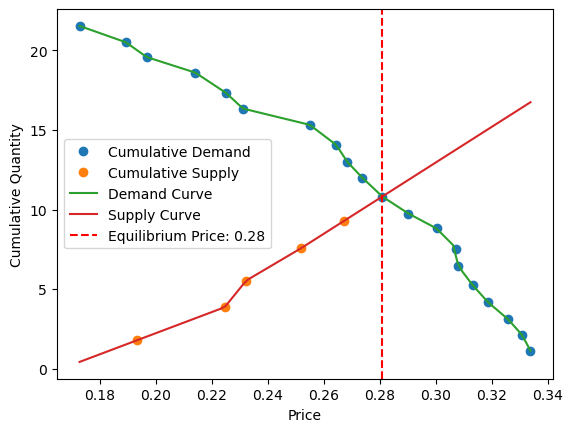

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Provided data
buyer_demand = np.array([1.12063325, 0.9857598, 0.98442965, 1.07826701, 1.06620686, 1.24030019,
                         1.07207342, 1.25959694, 0.93741358, 1.06155159, 1.2034635, 0.98737088,
                         1.05401666, 1.27260418, 1.02132556, 0.99286566, 1.26574014, 0.98006726,
                         0.92444928, 1.03419306])
excess_supply = np.array([1.78637576, 2.06871361, 1.67792007, 2.03178691, 1.72287187])
buyer_wtp = np.array([0.33379456, 0.33081219, 0.32583961, 0.31865116, 0.31319541, 0.30785827,
                      0.30737703, 0.30026024, 0.29025034, 0.28095414, 0.27371231, 0.2683879,
                      0.26451522, 0.2549993, 0.23117504, 0.22505115, 0.21417748, 0.19678823,
                      0.18943238, 0.17283776])
seller_wta = np.array([0.19345834, 0.22460925, 0.23233299, 0.25189532, 0.26726563])

# Sort WTP in descending order for demand and WTA in ascending order for supply
sorted_wtp = buyer_wtp
sorted_wta = seller_wta

# Calculate cumulative demand and supply
cumulative_demand = np.cumsum(buyer_demand)
cumulative_supply = np.cumsum(excess_supply)

# Interpolation functions for cumulative demand and supply
cumulative_demand_interp = interp1d(sorted_wtp, cumulative_demand, kind='linear', fill_value="extrapolate")
cumulative_supply_interp = interp1d(sorted_wta, cumulative_supply, kind='linear', fill_value="extrapolate")

# Define the equilibrium function
def equilibrium_function(price):
    return cumulative_demand_interp(price) - cumulative_supply_interp(price)

# Solve for the equilibrium price
initial_guess = np.mean(sorted_wtp)  # Initial guess can be the mean of WTP values
equilibrium_price = fsolve(equilibrium_function, initial_guess)[0]

print(f'Equilibrium Price: {equilibrium_price}')

# Plot for visualization
common_prices = np.linspace(min(sorted_wtp[-1], sorted_wta[0]), max(sorted_wtp[0], sorted_wta[-1]), 100)
plt.plot(sorted_wtp, cumulative_demand, 'o', label='Cumulative Demand')
plt.plot(sorted_wta, cumulative_supply, 'o', label='Cumulative Supply')
plt.plot(common_prices, cumulative_demand_interp(common_prices), label='Demand Curve')
plt.plot(common_prices, cumulative_supply_interp(common_prices), label='Supply Curve')
plt.axvline(x=equilibrium_price, color='r', linestyle='--', label=f'Equilibrium Price: {equilibrium_price:.2f}')
plt.xlabel('Price')
plt.ylabel('Cumulative Quantity')
plt.legend()
plt.show()


## Setting up the AMM using the equilibrium price

In [ ]:
import numpy as np

def determine_amm_liquidity( equilibrium_price, k):
        """ 
        determines the amount of energy tokens (x tokens) and 
        money tokens (y tokens) that the protocol should be initialized with 
        using the config parameter amm_liquidity_k

        INPUT: 
            equilibrium_price
        RETURN: 
            x_token_amt (float), y_token_amt (float)
            
        """
        
        y_token_amt = np.sqrt(k/equilibrium_price)

        x_token_amt = y_token_amt*equilibrium_price

        return x_token_amt, y_token_amt



In [ ]:
determine_amm_liquidity(0.28, 10)

(1.6733200530681511, 5.976143046671968)

Making sure the following multiplication is k

In [ ]:
1.6733200530681511*5.976143046671968

10.0

In [ ]:
amm = AMM()